### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 1.1 Exploratory Data Analysis - Part 1
## EDA of White Wine Quality Data Before Outliers Removed
#### Audrey Hughes Rager
#### February 28, 2021




## Import Python Packages

In [14]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

### Import data

In [15]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
#whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")
#Rename columns to remove spaces 
#to make the next step of Removing Outliers easier
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)



### Remove Outliers

In [16]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    

fixed_acidity maximum: 14.2
fixed_acidity minimum: 3.8
fixed_acidity Q1: 6.3
fixed_acidity Q3: 7.3
fixed_acidity range: 10.399999999999999
fixed_acidity IQR: 1.0
ratio of Range fo IQR: 10.399999999999999

volatile_acidity maximum: 1.1
volatile_acidity minimum: 0.08
volatile_acidity Q1: 0.21
volatile_acidity Q3: 0.32
volatile_acidity range: 1.02
volatile_acidity IQR: 0.11000000000000001
ratio of Range fo IQR: 9.272727272727272

citric_acid maximum: 1.66
citric_acid minimum: 0.0
citric_acid Q1: 0.27
citric_acid Q3: 0.38
citric_acid range: 1.66
citric_acid IQR: 0.10999999999999999
ratio of Range fo IQR: 15.090909090909092

residual_sugar maximum: 31.6
residual_sugar minimum: 0.6
residual_sugar Q1: 1.8
residual_sugar Q3: 9.6
residual_sugar range: 31.0
residual_sugar IQR: 7.8
ratio of Range fo IQR: 3.9743589743589745

chlorides maximum: 0.34600000000000003
chlorides minimum: 0.012
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.05
chlorides range: 0.334
chlorides IQR: 0.01399999999999999

In [18]:
#Return to original column names
df = df.rename({'fixed_acidity': 'fixed acidity','volatile_acidity': 'volatile acidity', 'citric_acid': 'citric acid', 'residual_sugar':'residual sugar',  'free_sulfur_dioxide':'free sulfur dioxide', 'total_sulfur_dioxide':'total sulfur dioxide'}, axis=1)

#Output to *.csv file for possible future use
df.to_csv('winequality-white-outliers-removed.csv',sep=";")


### Check for null values

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values.

### Inspect data

In [20]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [21]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3951.000000       3951.000000  3951.000000     3951.000000   
mean        6.809048          0.263828     0.322749        6.352759   
std         0.726417          0.076298     0.083076        4.905477   
min         4.900000          0.080000     0.110000        0.600000   
25%         6.300000          0.210000     0.270000        1.800000   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.310000     0.370000        9.600000   
max         8.700000          0.485000     0.540000       20.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3951.000000          3951.000000           3951.000000  3951.000000   
mean      0.042299            34.730575            136.953176     0.993844   
std       0.009889            14.941739             41.049024     0.002877   
min       0.016000             2.000000             19.000000     0.987110   
25%       0.035000            24.000000            107.000000     0.991580   
50%       0.042000            34.000000            132.000000     0.993520   
75%       0.049000            45.000000            166.000000     0.995870   
max       0.071000            78.000000            253.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  3951.000000  3951.000000  3951.000000  3951.000000  
mean      3.189043     0.481445    10.592035     5.953936  
std       0.137980     0.098904     1.214421     0.856194  
min       2.830000     0.220000     8.400000     3.000000  
25%       3.100000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.500000     6.000000  
75%       3.280000     0.540000    11.400000     6.000000  
max       3.570000     0.760000    14.200000     9.000000

## EDA

### Histograms

Wine Quality


<AxesSubplot:xlabel='quality', ylabel='count'>

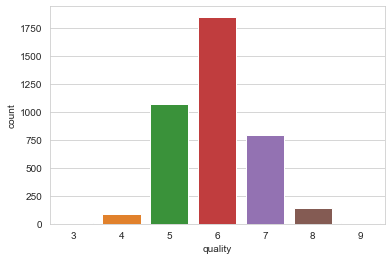

In [22]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df)

In [23]:

df.groupby(['quality']).size()

quality
3       9
4      87
5    1071
6    1847
7     788
8     145
9       4
dtype: int64

In [24]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
for i in qual_list:
    proportion = quant_list[j]/ n
    percentage = round((proportion*100),2)
    print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; " + str(percentage)+"%") 
    #print(j)
    j += 1
   

quality 3; n = 20; 0.41%
quality 4; n = 163; 3.33%
quality 5; n = 1457; 29.75%
quality 6; n = 2198; 44.88%
quality 7; n = 880; 17.97%
quality 8; n = 175; 3.57%
quality 9; n = 5; 0.1%


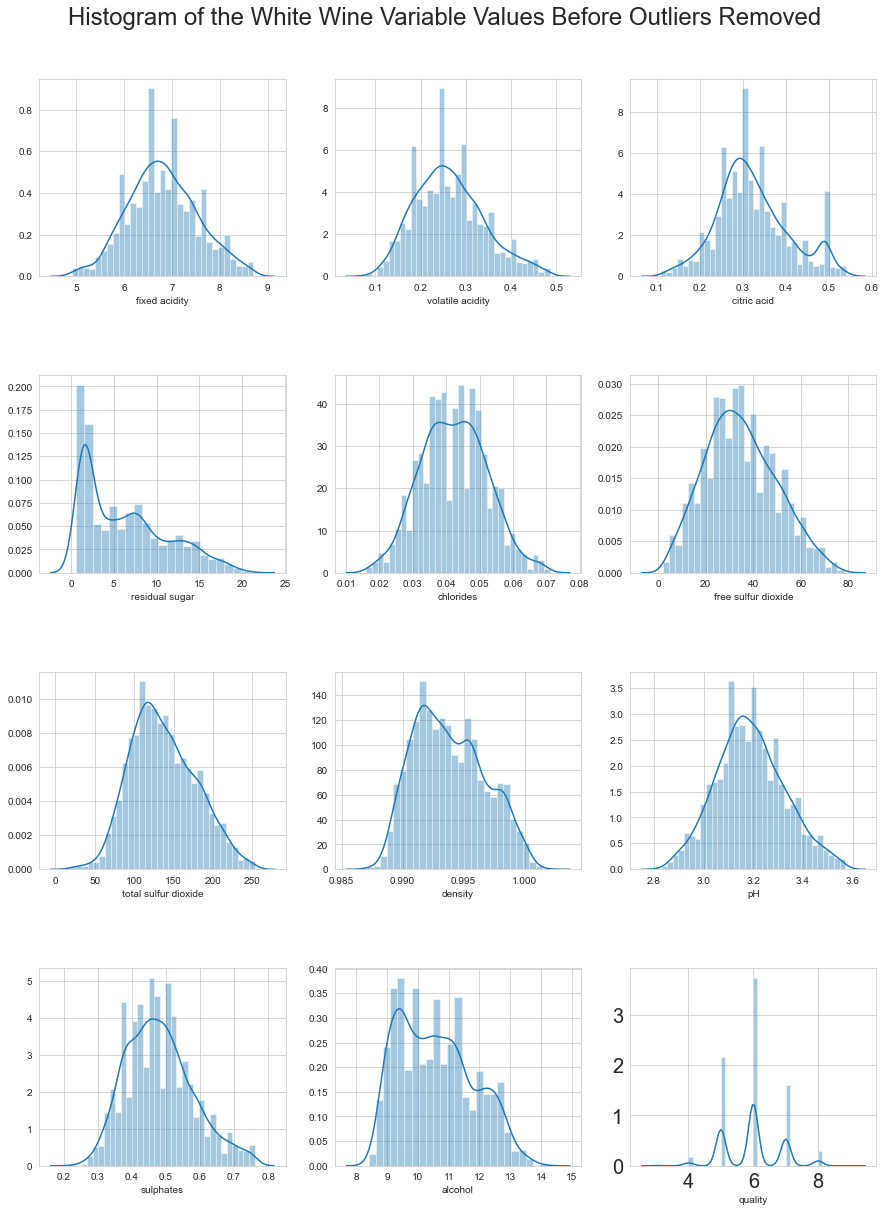

In [25]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values Before Outliers Removed")



### Boxplots

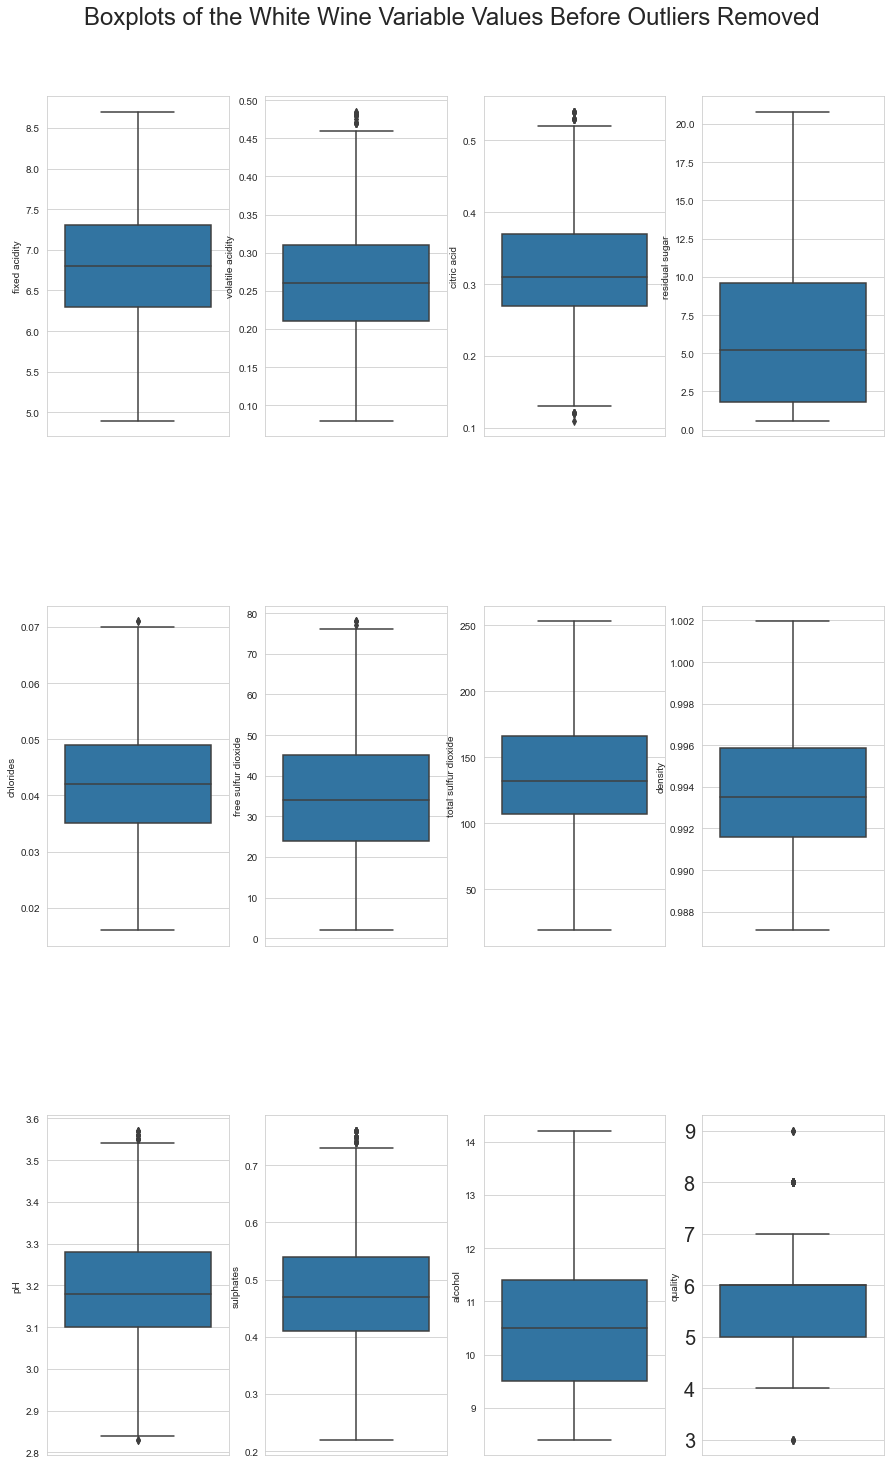

In [26]:
#Boxplots
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")



### Computing Skewness

In [27]:
plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skew")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness')

skewness_check(df[plot_columns])

White Wine Skewness


Column  Skewness   Skew Category
0          fixed acidity  0.146110      Light Skew
1       volatile acidity  0.427268      Light Skew
2            citric acid  0.394712      Light Skew
3         residual sugar  0.738206  Heavily Skewed
4              chlorides  0.098309      Light Skew
5    free sulfur dioxide  0.280710      Light Skew
6   total sulfur dioxide  0.301491      Light Skew
7                density  0.295797      Light Skew
8                     pH  0.208880      Light Skew
9              sulphates  0.469264      Light Skew
10               alcohol  0.383163      Light Skew
11               quality  0.180137      Light Skew

#### Observations regarding White Wine variables

<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.


</ul>

 

### Correlation Matrices
#### Spearman

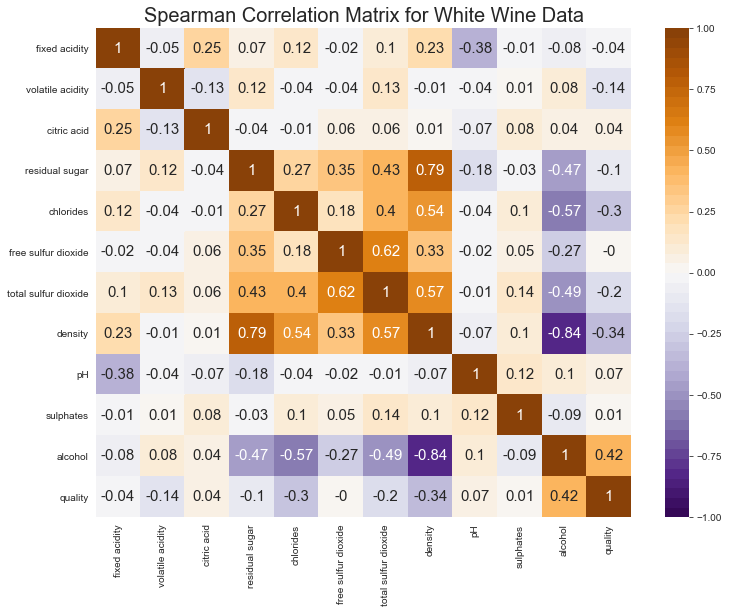

In [28]:
def confusion_matrix_plot(data, title = "Spearman Correlation Matrix for Wine Data Before Outliers Removed", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Spearman Correlation Matrix for White Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineSpearmanBOD.png")





In [29]:
print("Spearman")
df.corr(method ="spearman")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.423930
pH                      0.067072
citric acid             0.038853
sulphates               0.005869
free sulfur dioxide    -0.001130
fixed acidity          -0.041830
residual sugar         -0.095144
volatile acidity       -0.136401
total sulfur dioxide   -0.203377
chlorides              -0.304291
density                -0.337476
Name: quality, dtype: float64

#### Pearson's

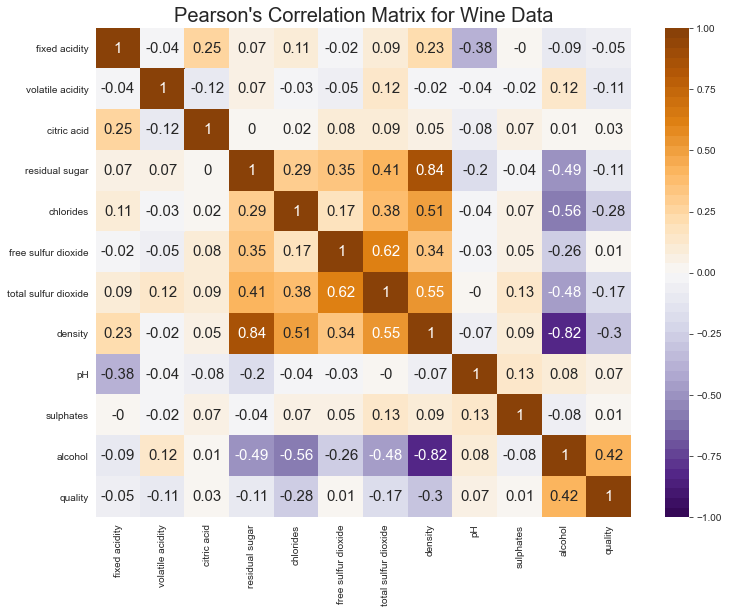

In [30]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [31]:
print("Spearman")
df.corr(method ="pearson")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.416659
pH                      0.066530
citric acid             0.026268
sulphates               0.014718
free sulfur dioxide     0.013565
fixed acidity          -0.051126
residual sugar         -0.111364
volatile acidity       -0.112981
total sulfur dioxide   -0.174636
chlorides              -0.283634
density                -0.301046
Name: quality, dtype: float64

#### Kendall

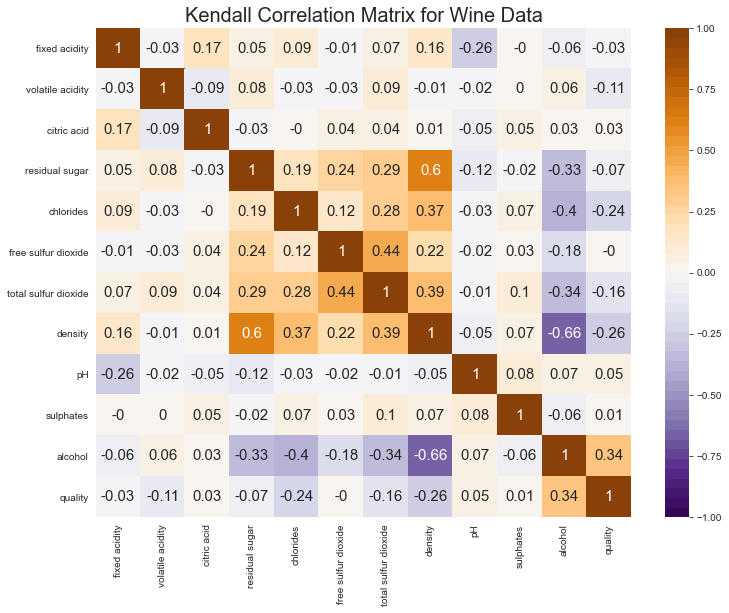

In [32]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [33]:
print("Kendall")
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

Kendall


quality                 1.000000
alcohol                 0.335053
pH                      0.051769
citric acid             0.031069
sulphates               0.005410
free sulfur dioxide    -0.001216
fixed acidity          -0.032298
residual sugar         -0.072846
volatile acidity       -0.108392
total sulfur dioxide   -0.156118
chlorides              -0.238098
density                -0.258846
Name: quality, dtype: float64

### Scatterplots of Predictors

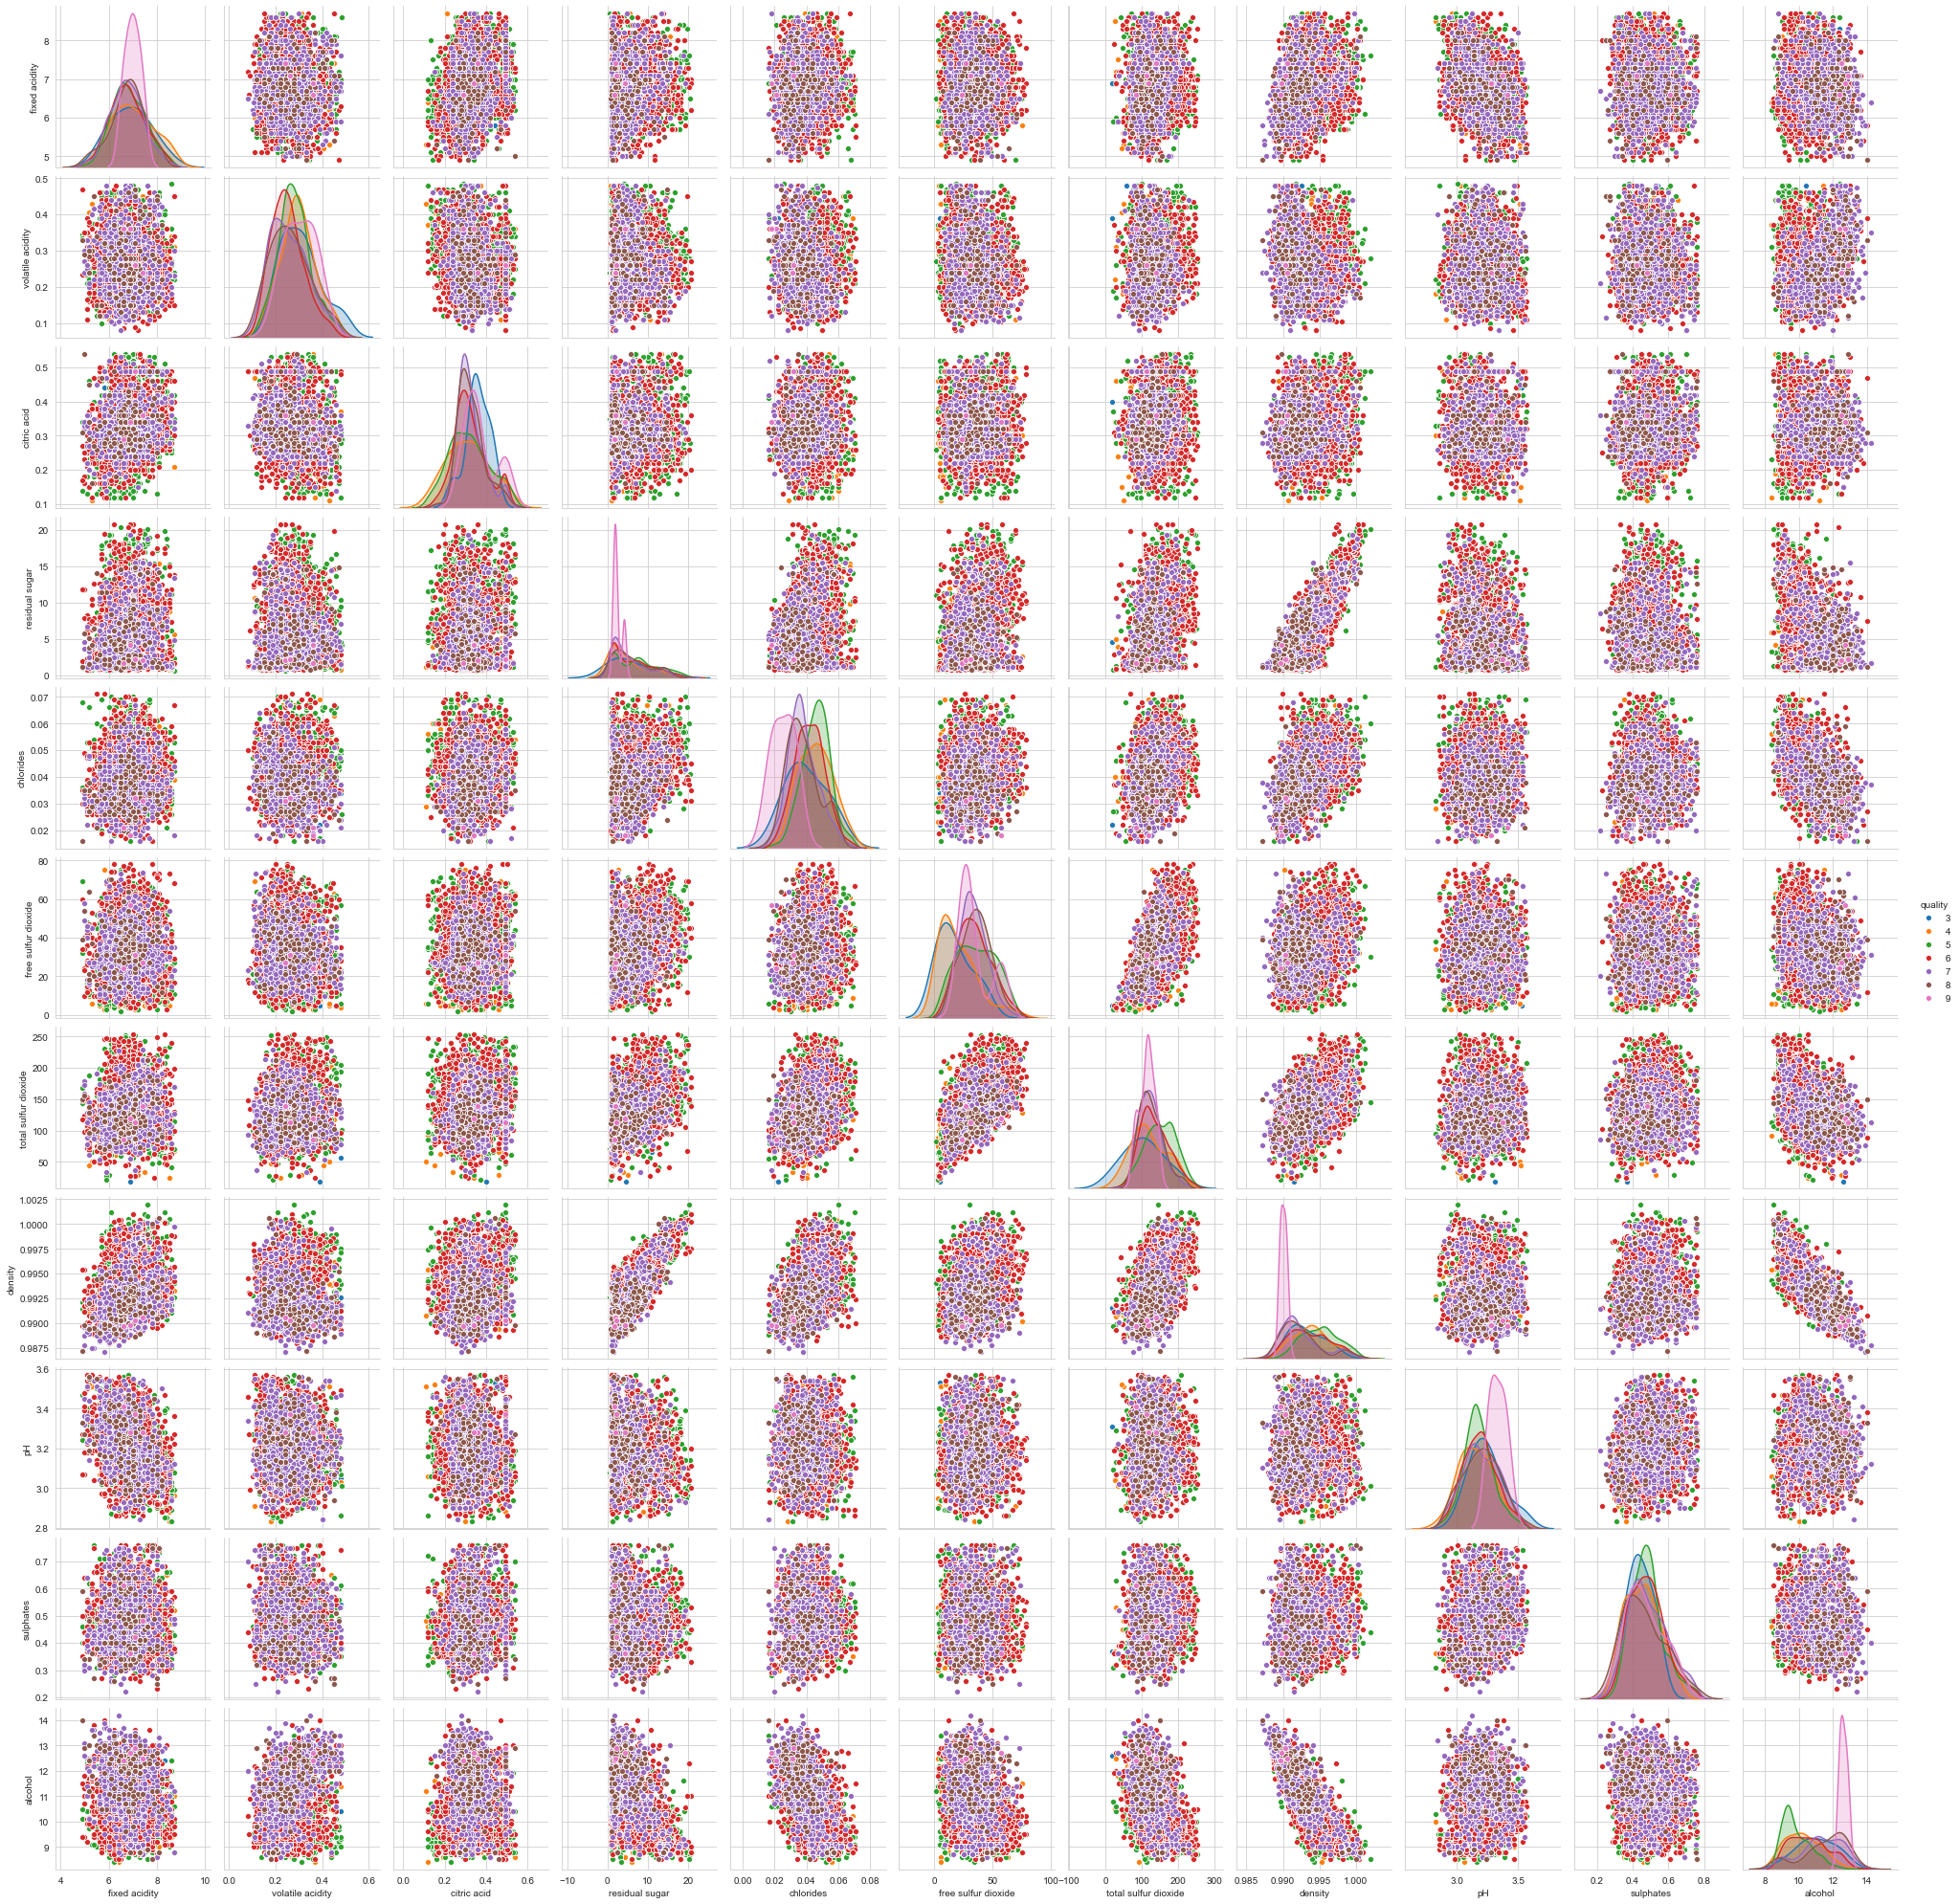

In [34]:
sns.pairplot(df,hue='quality')

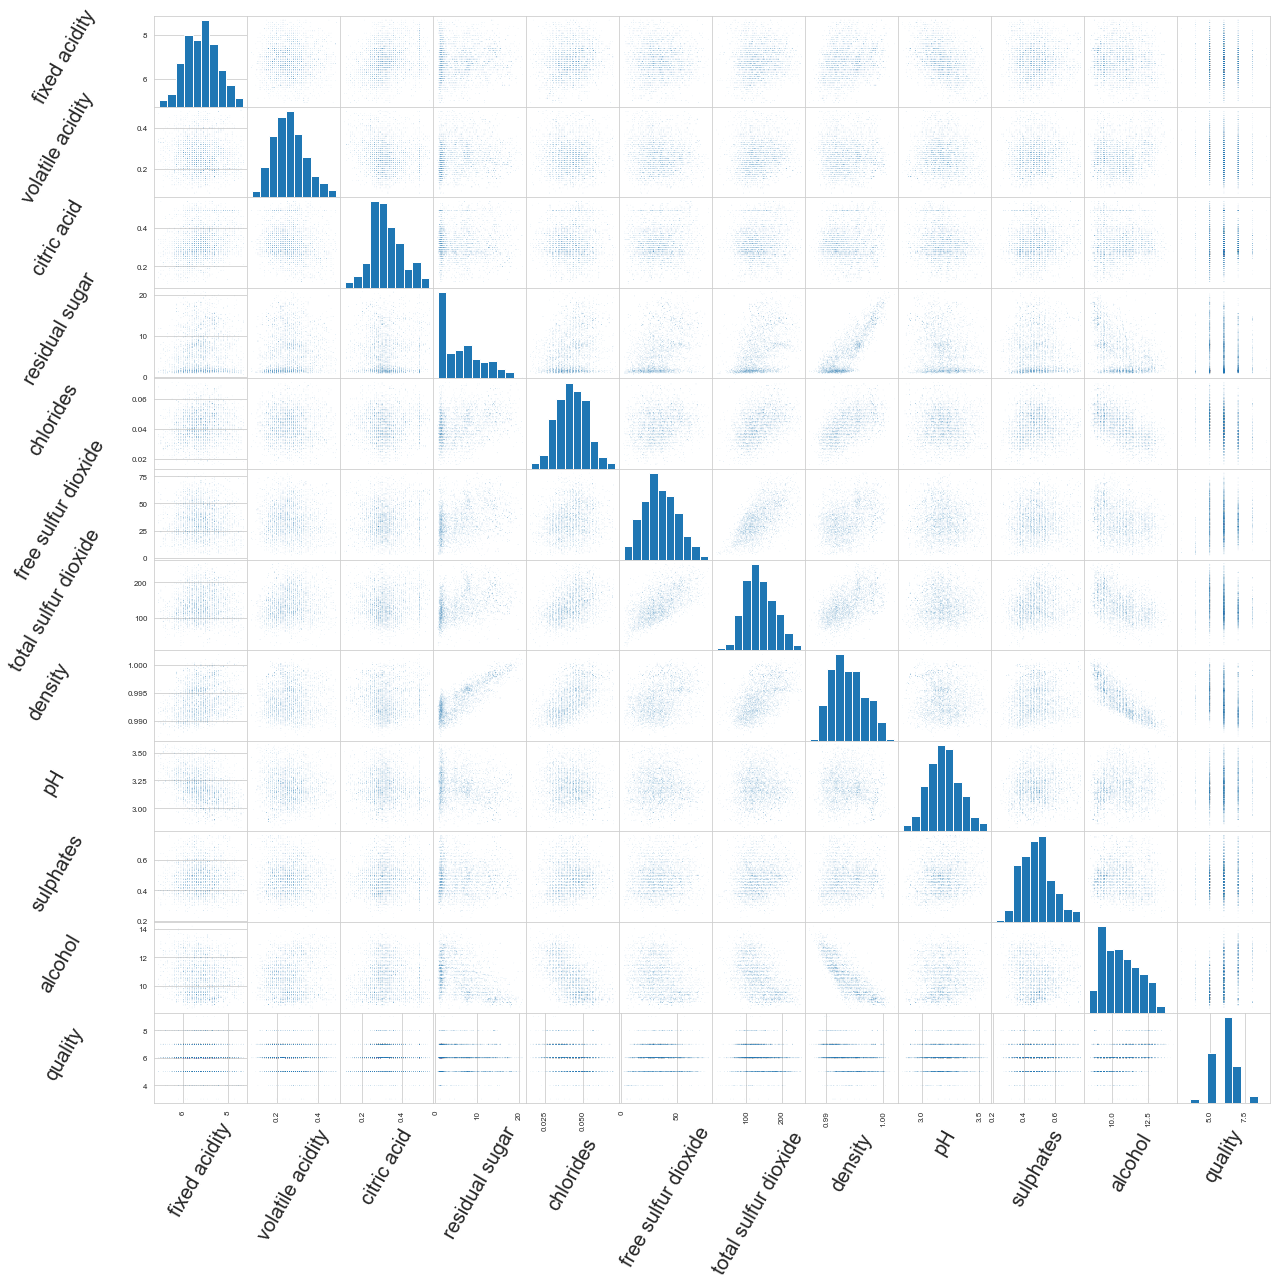

In [35]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    

<h3>1. Alcohol</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol Percent by White Wine Quality Box Plots')]

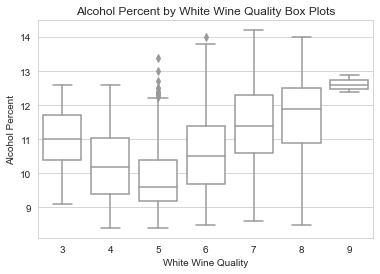

In [36]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>2. Density</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Density by White Wine Quality Box Plots')]

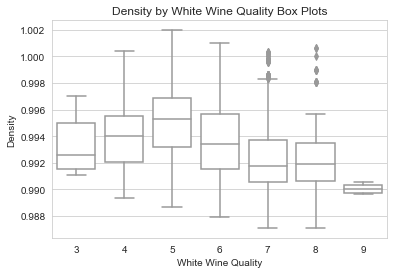

In [37]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>3. Chlorides</h3>    

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Chlorides'),
 Text(0.5, 1.0, 'Chlorides by White Wine Quality Box Plots')]

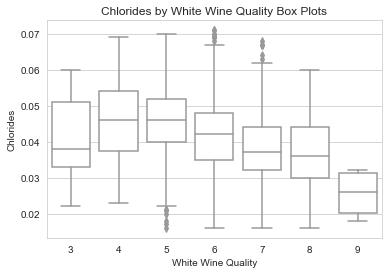

In [38]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>4. Volatile Acidity</h3>      

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 1.0, 'Volatile Acidity by White Wine Quality Box Plots')]

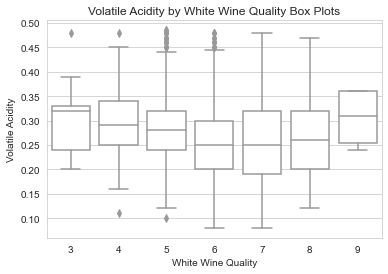

In [39]:
#Quality by Volatile Acidity


myAttribute = 'volatile acidity'
myYLabel = 'Volatile Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>5. Citric Acid</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid by White Wine Quality Box Plots')]

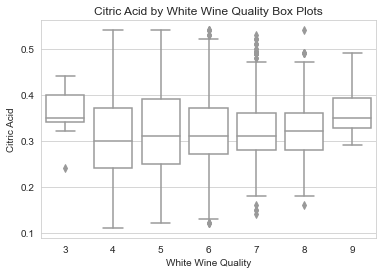

In [40]:
#Quality by Citric Acid

myAttribute = 'citric acid'
myYLabel = 'Citric Acid'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>6. Fixed Acidity</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity by White Wine Quality Box Plots')]

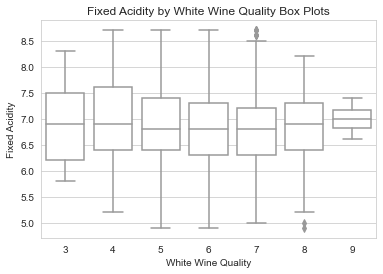

In [41]:
#Quality by Fixed Acidity

myAttribute = 'fixed acidity'
myYLabel = 'Fixed Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>7. Free Sulfur Dioxide</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Free Sulfur Dioxide'),
 Text(0.5, 1.0, 'Free Sulfur Dioxide by White Wine Quality Box Plots')]

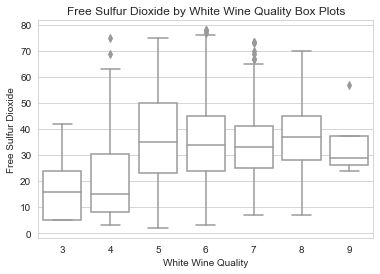

In [42]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free sulfur dioxide'
myYLabel = 'Free Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>8. Total Sulfur Dioxide</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Total Sulfur Dioxide'),
 Text(0.5, 1.0, 'Total Sulfur Dioxide by White Wine Quality Box Plots')]

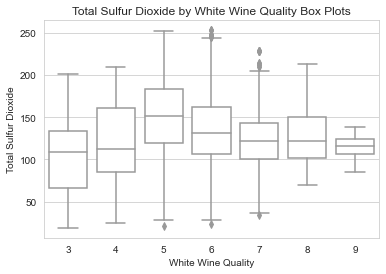

In [43]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total sulfur dioxide'
myYLabel = 'Total Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>9. pH</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH by White Wine Quality Box Plots')]

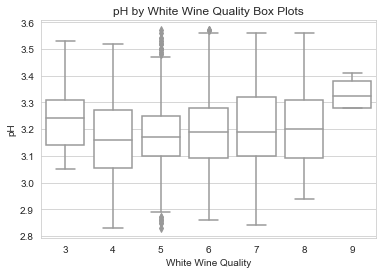

In [44]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>10. Sulphates</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates by White Wine Quality Box Plots')]

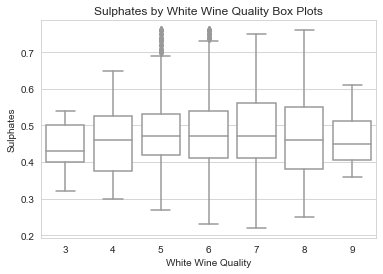

In [45]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>11. Residual Sugar</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Residual sugar'),
 Text(0.5, 1.0, 'Residual sugar by White Wine Quality Box Plots')]

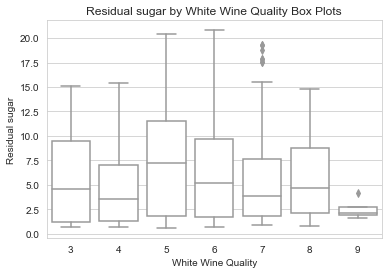

In [46]:
#Quality by Residual Sugar

myAttribute = 'residual sugar'
myYLabel = 'Residual sugar'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


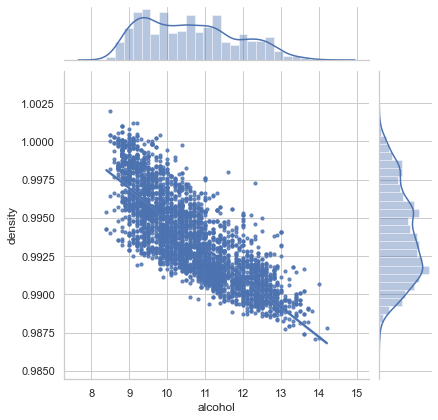

In [48]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


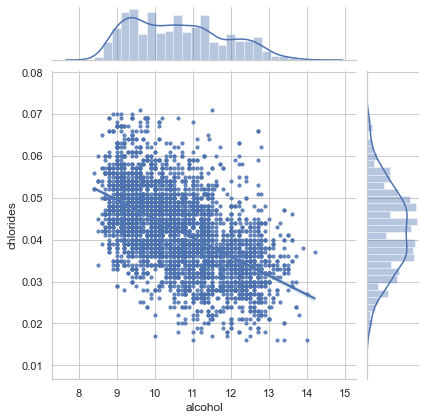

In [49]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

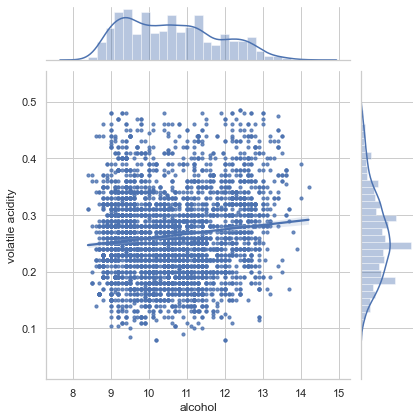

In [50]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

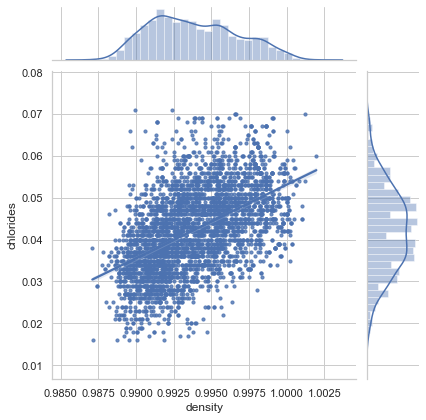

In [51]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

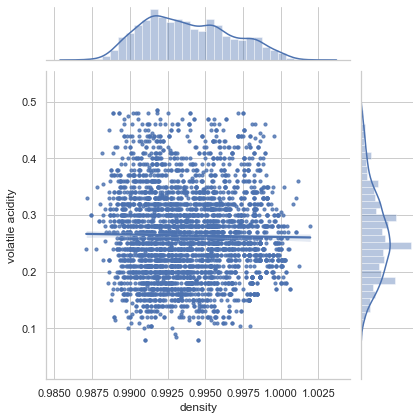

In [52]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

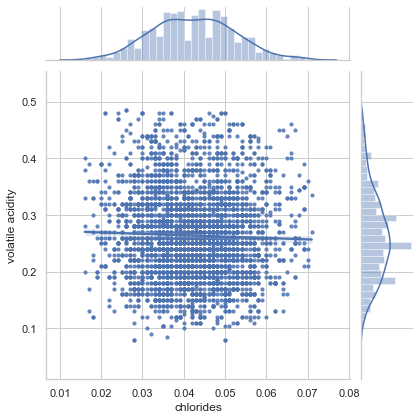

In [53]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

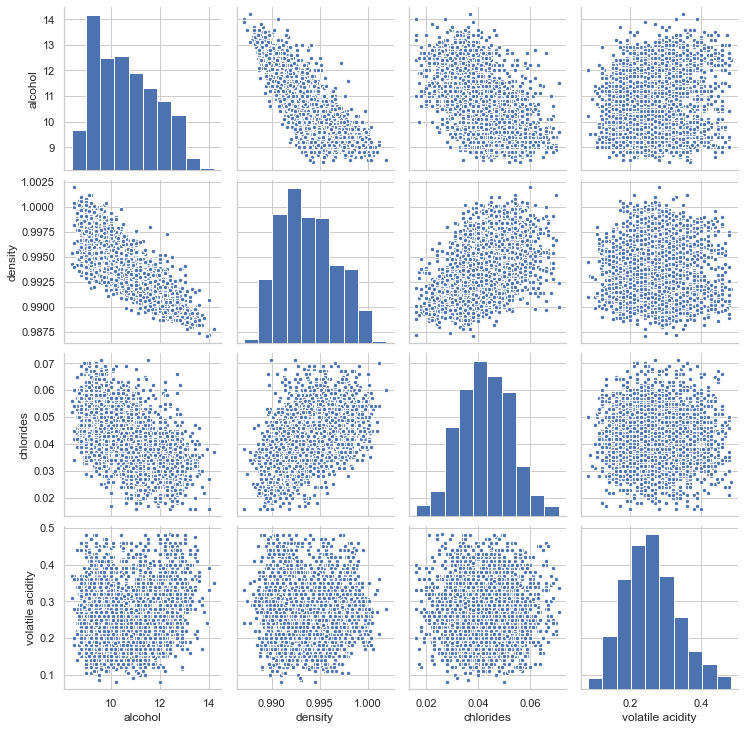

In [54]:

data = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))